In [4]:
#load data
import cv2
def img_2_nparray(img_path="./images/img_000.png"):
    img_matrix = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return img_matrix.ravel()

In [5]:
import numpy as np

N = 300
matrix = np.empty((0, 6200), int)
for i in range(N):
    matrix = np.vstack((matrix, img_2_nparray(img_path="./images/img_"+str(i).zfill(3)+".png")))
print(matrix.shape)

(300, 6200)


In [6]:
X = matrix /255.0

In [9]:
# PCA  
from sklearn.decomposition import PCA
N = 10
pca = PCA(n_components=N)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

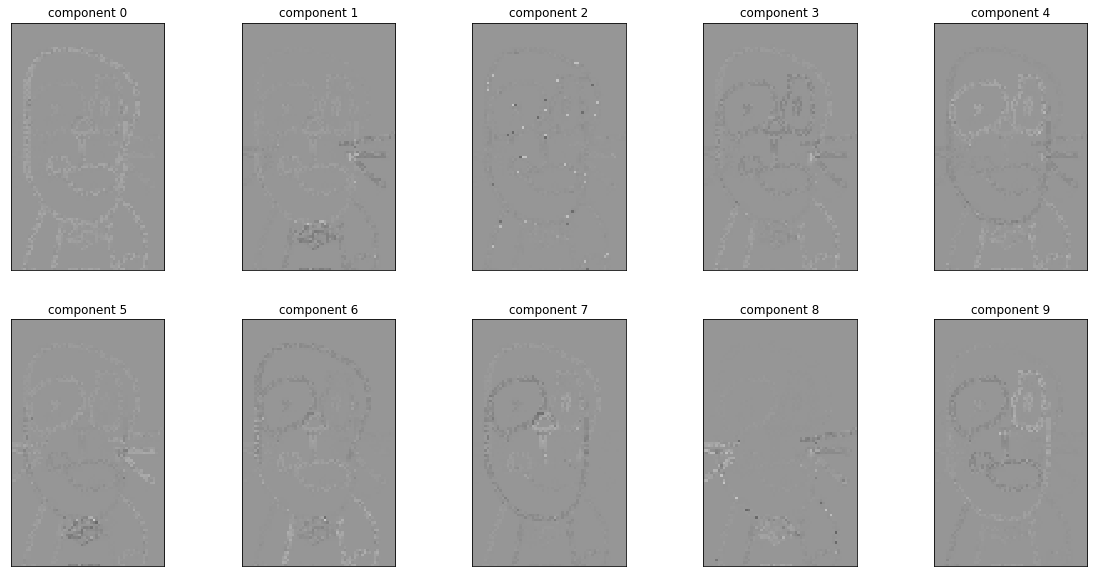

In [11]:
# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cols = 5
rows = int(np.ceil(N/float(cols)))

fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20,10))

for i in range(N):
    r = i // cols
    c = i % cols
    axes[r, c].imshow(pca.components_[i].reshape(100, 62),vmin=-0.5,vmax=0.5, cmap = cm.Greys_r)
    axes[r, c].set_title('component %d' % i)
    axes[r, c].get_xaxis().set_visible(False)
    axes[r, c].get_yaxis().set_visible(False)

In [12]:
cv = pca.get_covariance()
W, v = np.linalg.eig(cv)
print("eigenvector")
print(v)
print("eigenvalue")
print(W)

eigenvector
[[ 1.30430550e-16+0.j  8.83355693e-18+0.j  5.28100542e-16+0.j ...
   4.29939226e-15+0.j  4.29939226e-15+0.j -1.19113076e-15+0.j]
 [-5.36752270e-17+0.j  8.96784287e-17+0.j -1.31467536e-16+0.j ...
  -1.66081586e-04+0.j -1.66081586e-04+0.j -2.62382131e-06+0.j]
 [-2.27891094e-17+0.j  9.30607891e-17+0.j  9.65289159e-18+0.j ...
  -1.46086636e-03+0.j -1.46086636e-03+0.j  1.04272593e-03+0.j]
 ...
 [ 3.96713998e-31+0.j  6.87203919e-30+0.j -2.20923236e-31+0.j ...
  -6.74857109e-21+0.j -5.01022140e-30+0.j  1.46266386e-10+0.j]
 [ 3.96713998e-31+0.j  6.87203919e-30+0.j -2.20923236e-31+0.j ...
  -7.05412622e-30+0.j -7.05412622e-30+0.j  4.48087019e-30+0.j]
 [ 3.96713998e-31+0.j  6.87203919e-30+0.j -2.20923236e-31+0.j ...
   2.69942844e-20+0.j -5.81539001e-30+0.j -9.15591004e-11+0.j]]
eigenvalue
[2.92042501e+01+0.j 4.98279185e+00+0.j 3.45304156e+00+0.j ...
 1.65092556e-02+0.j 1.65092556e-02+0.j 1.65092556e-02+0.j]


In [13]:
print("eigenvector[0]")
print(v[0])
print("eigenvector[0] -> size")
print(v[0].shape)

eigenvector[0]
[ 1.30430550e-16+0.j  8.83355693e-18+0.j  5.28100542e-16+0.j ...
  4.29939226e-15+0.j  4.29939226e-15+0.j -1.19113076e-15+0.j]
eigenvector[0] -> size
(6200,)


In [14]:
print(pca.components_[0:3].shape)
pri_1 = X @ pca.components_[0]
pri_2 = X @ pca.components_[1]
pri_3 = X @ pca.components_[2]
pri_4 = X @ pca.components_[3]
pri_5 = X @ pca.components_[4]
pri_6 = X @ pca.components_[5]
pri_7 = X @ pca.components_[6]
pri_8 = X @ pca.components_[7]
pri_9 = X @ pca.components_[8]

(3, 6200)


Text(0.5, 0.92, 'Plot 1- 2- 3')

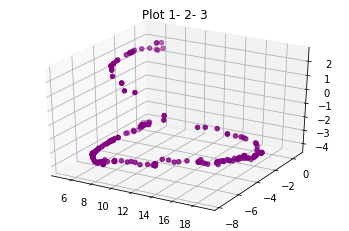

In [15]:
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter3D(pri_1, pri_2, pri_3, c = 'purple')
axes.set_title("Plot 1- 2- 3")

Text(0.5, 0.92, 'Plot 4- 5- 6')

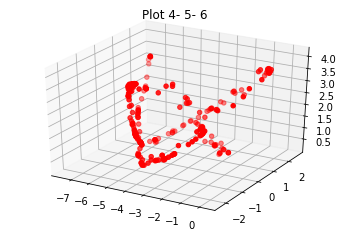

In [16]:
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter3D(pri_4, pri_5, pri_6, c = 'red')
axes.set_title("Plot 4- 5- 6")

Text(0.5, 0.92, 'Plot 7- 8- 9')

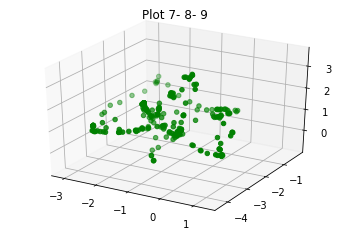

In [17]:
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter3D(pri_7, pri_8, pri_9, c = 'green')
axes.set_title("Plot 7- 8- 9")